venv/Scripts/deactivate to turn the virtual environment off

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


C:\Users\Isiah Turner\AppData\Local\Temp\ipykernel_31636\3332377101.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Setting up the pandas dataframe

In [2]:
# Creating a variable list that will be the columns header
variableList = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long'
                , 'fM3Trans', 'fAlpha', 'fDist', 'class']

# Reading in the data into a pandas dataframe
data = pd.read_csv('magic04.data', names = variableList)

# Computers can't decipher strings as well as numbers, so need to convert the 
# g's and h's as 0 and 1 integers
data['class'] = data['class'].apply(lambda x: int(1) if x == 'g' else int(0))
# data["class"] = (data["class"] == "g").astype(int)

# Visualizing the data to make sure the changes went through
data



fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

Next we are going to see if we can classify the samples as gamma or hadron, this method is called Classification

Intro to machine learning:
- What is Machine Learning? Machine learning is a subdomain of computer science that
    focuses on algorithms to help computers learn without explicit programming

- Our columns are our features, these are passed into our model to predict the label 
    (in this case the 'class' column)

- When you are working with a true label (a value we know for sure is the outcome), that
    is supervised learning

- Types of Machine Learning:
    1. Supervised Learning: where we use labeled in
    puts which means we have a corresponding output. We do use these to train models and to learn outputs

    2. Unsupervised Learning: where we use unlabeled data to have the machines
    find patterns within the data

    3. Reinforcement Learning: there's an agent learning in some kind of interactive 
    environment based on rewards and penalties

- All machine learning models have inputs into the model and the output that the model produces. The inputs INTO the model are called FEATURE VECTORS

- When dealing with nominal (orderless) categorical data we have to perform 'One-hot Encoding'. This is where we go by a 0 or 1 system depending on the location of the matching category. So let's say we have a list of countries, ['USA', 'Italy', 'India'], a USA encoding would be [1, 0, 0] and Italy would be [0, 1, 0]

Type of Predictions our Supervised Learning Models can get:

1. Classification: predicting discrete classes (hot dog vs hamburger vs ice cream) or binary classification (hot dog vs not hot dog)

2. Regression: predicting continuous classes



How to Evaluate and train a model/know a model is doing well for a supervised learning model:

- Each row of a feature vector dataset will be fed into the model to output a prediction. Then we compare the predicted measure to the actual measure to see how far off the model's prediction was. 
    - The tinkering of the model after this evaluation is what we call 'training'

- We can't feed the entire dataset to the model, otherwise when we predict the next time it is biased and using data that is already seen. So the datasets will need to get broken up for different roles. 
    1. Training dataset: roughly around 60% or 80% of the dataset
    2. Validation dataset: roughly around 10% or 20% of the dataset
    3. Testing dataset: roughly around 10% or 20% of the dataset

1. We feed in the training dataset and get a vector of predictions that corresponds with each sample that was put into the model

2. To evaluate the model, we look for the difference between the prediction and the actual model. This is called 'Loss' and we want to do our best to minimize that loss during this 'training' phase

3. We now feed in the validation dataset to act as a REALITY CHECK to ensure the model can handle unseen data
    - At this step though, the Loss NEVER gets fed back into the model because we aren't training the model here
    - If you keep peeking at your test data and using that to tune, it's a bit like studying for class using a practice test that is exactly the same as the real test -- you're not really learning the material, you're just learning that one specific test.

4. Loop through the models and find the model that produces the lowest loss

5. Now run the test dataset through the best model to see how generalizable the model is
    - This is the FINAL reported performance





Metrics of Performance:

- What is really loss?
    Loss is the difference between the prediction and the actual values. LOSS GETS LOWER AS THE MODEL'S PERFORMANCE GETS BETTER

    1. L1 Loss: The absolute value function is shaped like a 'V' on a graph. This means that the farther you are, the greater your loss is
        -loss = sum(|yReal - yPredicted|)

    2. L2 Loss: This function is a quadratic function and has the 'U' shape. This means that if its close then the penalty is very minimal, but if it is far then then the penalty is much much more
        -loss = sum((yReal - yPredicted)**2)

    3. Binary Cross-Entropy Loss: The loss function used to measure and evaluate the loss during binary classification
        -loss = -1/N * sum(yReal * log(yPredicted) + (1-yReal) * log((1-yPredicted)))

- Accuracy
    1. Accuracy is how much did you get correct out of the total options

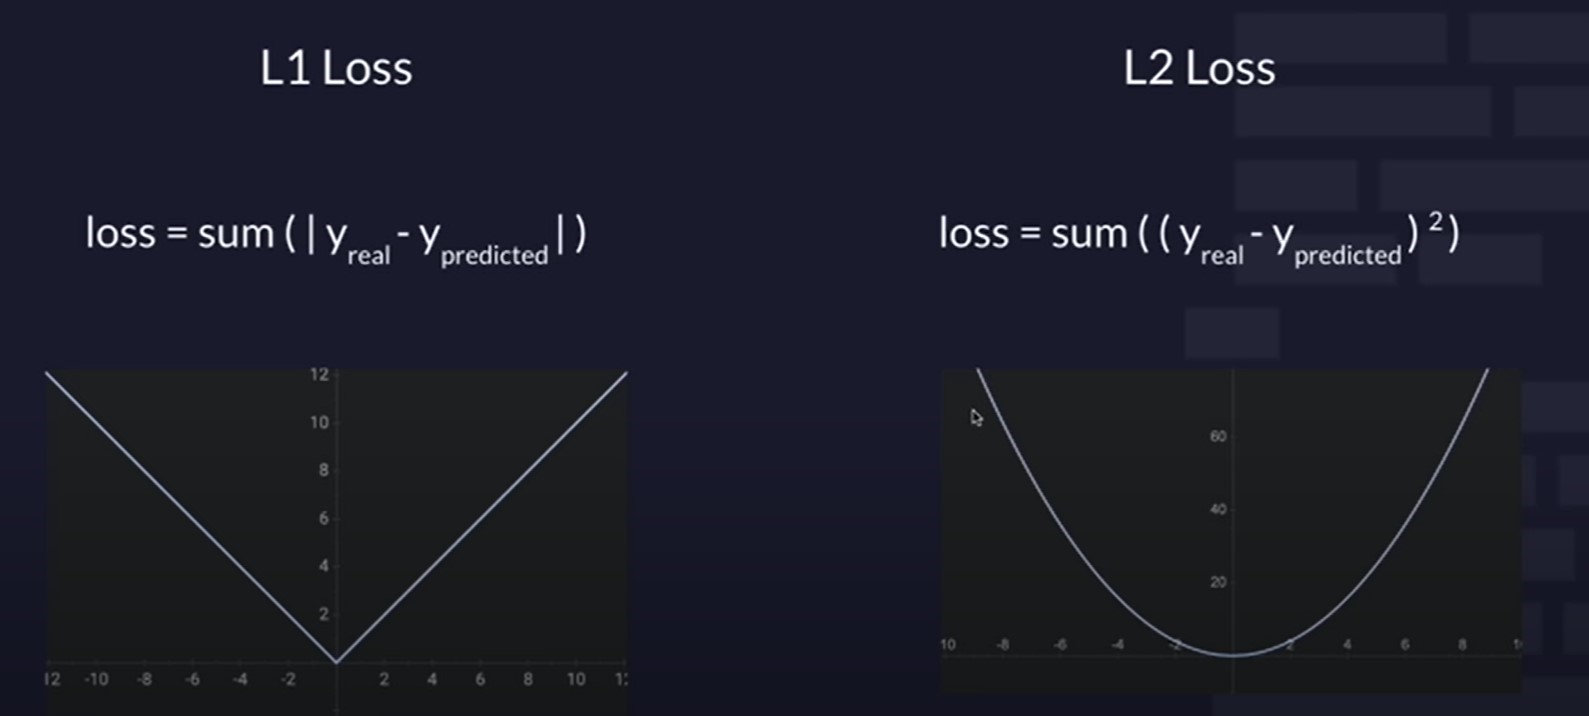

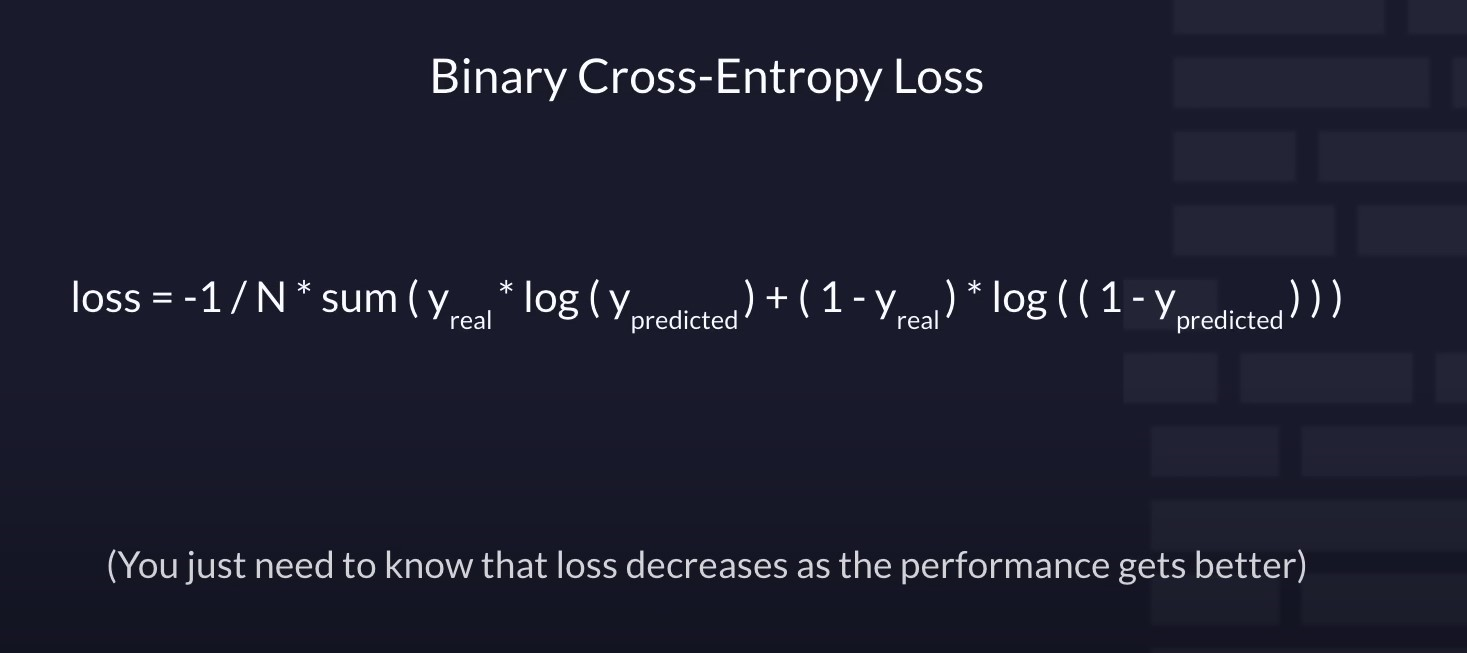

It is a good idea to plot out our data to make sure the features have anything
to do with the class


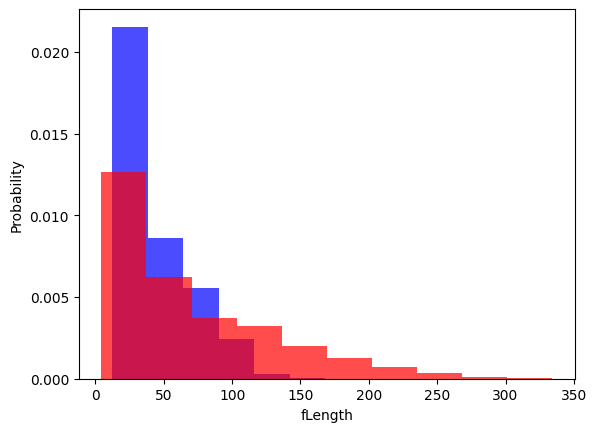

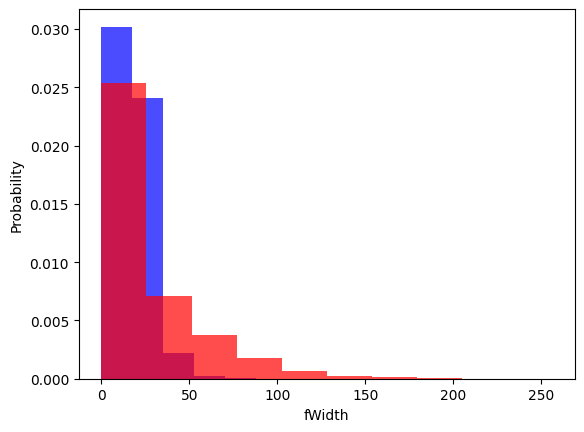

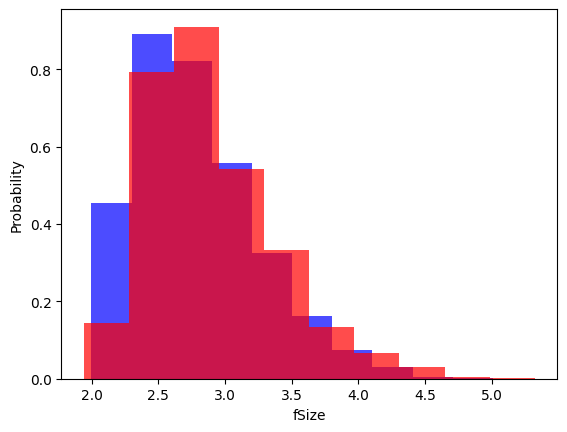

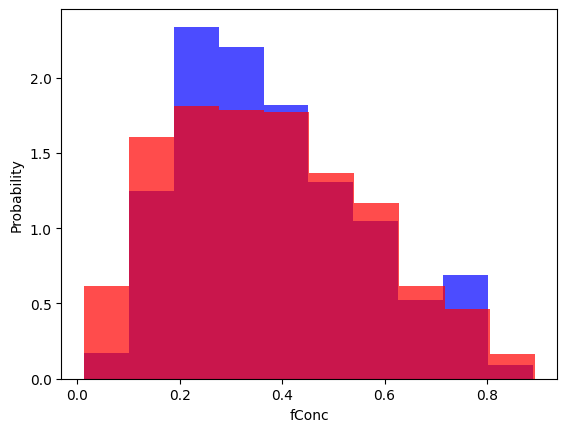

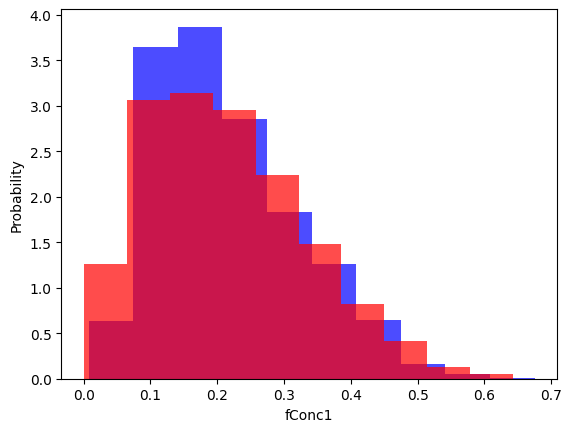

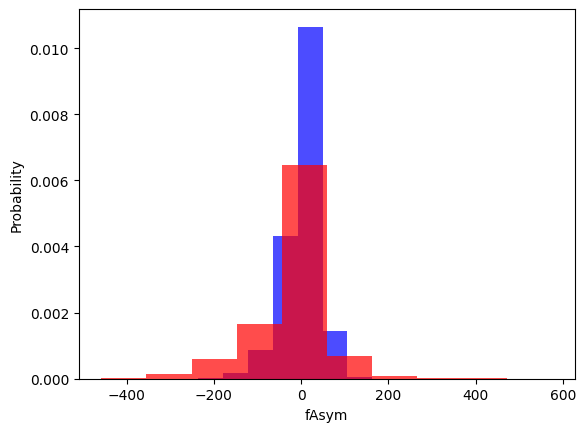

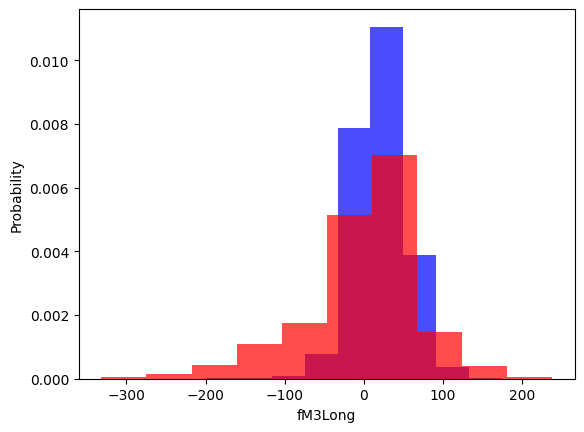

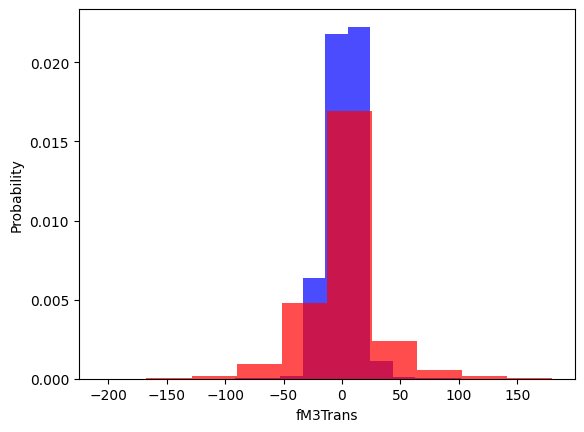

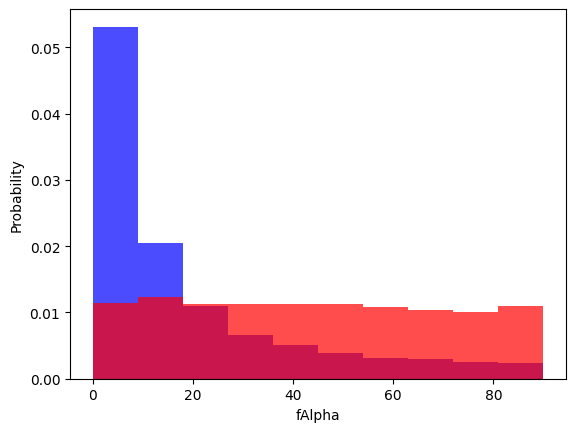

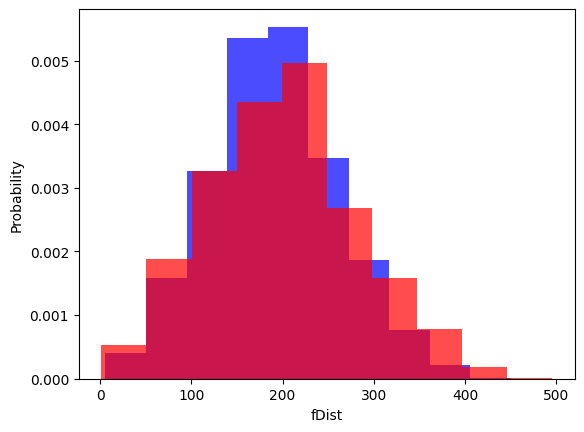

In [3]:
# Looping through all of the column names EXCEPT the 'class' column to see if there are any
# relationships. We use a histogram to get a good idea of what is affecting the data
for label in variableList[:-1]:
    plt.hist(data[data['class'] == 1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
    plt.hist(data[data['class'] == 0][label], color = 'red', label = 'hadron', alpha = 0.7, density = True)
    plt.xlabel(label)
    plt.ylabel('Probability')
    plt.show()

Creating the Training, Validation and Test datasets

In [4]:
# THis is where we split the dataset up. Splitting the dataframe into three sections. We
# first randomize the entire dataframe then split the first 60% into training, 20% into validation
# and 20% into test
train, valid, test = np.split(data.sample(frac= 1), [int(0.6 * len(data)), int(0.8*len(data))])

c:\Users\Isiah Turner\Documents\Machine-Learning\myVENV\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [8]:
len(train) + len(valid) + len(test)
len(data)

19020

Next we want to scale the data to its mean since all of the values are in the hundreds or in the tens. So we scale everything to its mean and standard deviation

In [5]:
# Creating a scalar function
def scale_dataset(dataframe, oversample = False):
    # Grabbing all of the columns except the last one since that is our label
    X = dataframe[dataframe.columns[:-1]].values
    
    # Grabbing our label column
    y = dataframe[dataframe.columns[-1]].values

    # Creating a scalar object
    scaler = StandardScaler()

    # Fitting the x valuues to the standard scaler. Then transforms all of the 
    # values based on that
    X = scaler.fit_transform(X)

    # If we want to oversample, create an oversample object and fit_transform the data to it.
    # All its doing is taking more of the less class
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)

    # Creating a 2-D numpy array to return. hstack grabs two arrays and stacks them
    # together horizontally. Numpy is particular about shapes so we have to use the 
    # .reshape method to make the 1-by-1 array (y) a 2-by-1 array. Important, the 
    # -1 tells numpy to infer the shape!
    dataset = np.hstack((X, np.reshape(y, (-1, 1))))

    return dataset, X, y


When checking the spread of the data, there is an uneven amount of gamma and hadron classes, so after checking the spread we may need to oversample the class with a 
higher frequency. 

In [6]:
print(len(train[train['class'] == 1])) # gamma
print(len(train[train['class'] == 0])) # hadrons

# print(len(train))


7342
4070


Scaling all of our datasets and oversampling using our function

In [7]:
train, xTrain, yTrain = scale_dataset(train, oversample= True)
valid, xValid, yValid = scale_dataset(valid, oversample= False)
test, xTest, yTest = scale_dataset(test, oversample= False)

In [8]:
print(len(yTrain[yTrain == 1]))
print(len(yTrain[yTrain == 0]))

print('')
print(len(train), len(valid), len(test))

print(len(data[data['class'] == 1]))
print(len(data[data['class'] == 0]))

7342
7342

14684 3804 3804
12332
6688


K Nearest Neighbors is a model that uses distance to help classify. This can be euclidean distance for a 2D plot or any other one that applies.
- It uses a quantitative x and y axis, with the data points themselves being a piece of categorical data (has a car, doesn't have a car, etc)
- In the nearest neighbor algorithm, there is a K and this K tells us how many neighbors we use to judge what the label is (typically 3 or 5)
- Then depending on a distance of a new data point, it determines what classification that it PROBABLY is
- For each parameter that is used, the distance function expands to meet it

![Alt text](<Screenshot (10).png>)

The sklearn package makes it so we don't have to code our own algorithm

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
# Creating the model object and telling the model to select based off the 5 nearest neighbors
knnModel = KNeighborsClassifier(n_neighbors = 3)

# Training the model by fitting the trained data set that has gone through standardization and oversampling
knnModel.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

Predicting and understanding the classification report
- Accuracy is how much we got right vs how many total, precision is how many True Positives and True Negatives we have.
- So, the model predicts some objects to be positive (or negative) when in fact they were supposed to be negative. Recall 
is out of all the ones that are actually that class, how many did we get. 
- F1-score is the combination of precision and accuracy. Because the test data set is so unbalanced, going to mostly be looking at the f1-score!

In [19]:
# Getting the predictions
yPred = knnModel.predict(xTest)

#! Remember, our Truth Values (known to be correct) is the yTest variable

# Using sklearn's classification report and visualizing their report
print(classification_report(yTest, yPred))



              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1339
           1       0.85      0.86      0.86      2465

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive-Bayes Model is a model that is based on conditional probability and Bayes Rule

 -Bayes Rule is asking for the probability of event A happening given that B happened (B is what we know/condition has already happened)

 -If we don't know the probability of A given B but can calculate it based off the Probability of B given A, Probability of A and the Probability of B
 
 -So for example, if we want to know the probability of having the disease if testing positive then we have to use the probability of testing positive if you have the disease, the probability of having the disease itself and probability of the evidence (having a positive test at all). Refer to images 1 and 2. 

We are expanding Bayes Rule to be applied to classification. Refer to Image 3

 -Posterior: So now what is the probability of the feature vector (the evidence) fitting into the category/class

 -Likelihood: what is the likelihood of seeing x (all the different features) from that category

 -Prior: of the entire population, what is the probability of the class in general

 -Evidence: The probability of x (the feature vector)

 -The left side of the equation at the bottom of image 3 is asking what the probability is that we are in class Ck based off the inputs. If we say our classification is playing soccer or not, the inputs (x's) could be the weather, how windy it is, the temperature, etc.

 -Again, it is equal to the probability of the inputs for that specific class, the probability of the class itself and the evidence. Refer to Image 4

 -However, the evidence is constant between classes so we can actually ignore the constant when calculating proportions. Refer to Image 4

 -The reason this is called naive is because we are assuming that each of the inputs are independent. Probability of it being rainy, wednesday, etc are independent.

In plain english, the probability that we are in some category given certain features is proportional to that class in general times the
probability of each of those features in the given class.


This is how we use this to make a classification:

 -Our yHat (predicted y) is going to be equal to the argmax and the right hand of our expression (the bottom part of Image 4 that is before the yellow)

 -We are going to take the k (class in this case) that maximizes the expression P(Ck|x1, x2, ... xn). Refer to Image 5

 -So we are solving and finding the k that maximizes the featuer inputs. This is known as MAP, Maximum A Posteriori

 -Picking the k that is most probable so we minimize the probability of misclassification
 
 -Those probabilities for each individual feature input are found in the training dataset, hopefully. 


Image 1

![Alt text](<Screenshot (11).png>)

Image 2

![Alt text](<Screenshot (12).png>)

Image 3

![Alt text](<Screenshot (13).png>)

Image 4

![Image 4](<Screenshot (16).png>)

Image 5

![Alt text](<Screenshot (17).png>)

Naive-Bayes Implementation

In [11]:
# Importing the naive-bayes model from sklearn'
from sklearn.naive_bayes import GaussianNB

In [12]:
# Creating the model
nbModel = GaussianNB()

# Training the model 
nbModel.fit(xTrain, yTrain)

GaussianNB()

In [13]:
yPred2 = nbModel.predict(xTest)
print(classification_report(yTest, yPred2))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1302
           1       0.74      0.91      0.82      2502

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression
-

- Y axis is going to be our y-value (label) and the x-axis will be one of our features
- Linear Regressions don't use yHat like Logistic Regression does and that is because we are predicting the probability between 0 and 1
- We'll be using p = mx +b, but it goes from negative infinity to infinity so we have to fix the equation.
- We fix the equation by setting the equation equal to the odds. so p/1-p = mx+b but there's another issue, it could still be negative
- We fix that by taking the log (ln) of the odds. So the equation is ln(p/1-p) = mx+b
- Now you solve for p. First step is by taking 'e' on each side to get rid of log. Then we multiply 1-p out. So now it is p = (1-p)e^mx+b
- Distribute it out: e^mx+b - pe^mx+b
- Move like terms to one side: p + pe^mx+b = e^mx+b
- Take out the common term: p(1+e^mx+b) = e^mx+b
- Isolate p: p = e^mx+b/1+e^mx+b
- Get the 1 on top by multiplying the numerator and denominator by e^-(mx+b): p = 1/1+e^-(mx+b)

All that work was to get to a special expression called the SIGMOID Function S(x) = 1/1+e^-y but in our case itll be mx+b instead of y. Really, so the line shape fits our data better instead of a typical straight line like in linear regressions (Image 2).

If we only have 1 feature (1 x value) then we call that a Simple Logistic Regression. If we have multiple features, we call it Multiple Logistic Regression.


Image 1

![Alt text](<Screenshot (18).png>)

Image 2

![Alt text](<Screenshot (19).png>)

Implementing Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
# Creating the model, however we can use different Penalties and use different lines to do this. For example,
# quadratic (l2) would really punish outliers, there's also a lot of things we can toggle on and off. Should depend on
# the validation data to mess with these changes. 
logModel = LogisticRegression()

# Training the model
logModel = logModel.fit(xTrain, yTrain)

In [17]:
# Making predictions
yPred3 = logModel.predict(xTest)

# Printing out the classification report
print(classification_report(yTest, yPred3))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      1302
           1       0.85      0.82      0.83      2502

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



Support Vector Machines (SVM)
-

- Both axes (x and y) are going to be our features and the classes are marked with different symbols
- The goal of SVM is to find a line that will best separate/split the labels, the line itself is the SVM model
- 2D it is a line, 3D is a plane, so on and so forth
- One thing that we really care about in SVM's is MARGINS. So not only care about separating the classes but also the boundary between the points and the line that we are drawing
- We want to MAXIMIZE our margins, as much space between the line and the class data points (Image 1)
- The data points that we are using to help find our divider are called support vectors
- The biggest issue with SVM's sometimes is that they are not very robust to outliers in the dataset
- Sometimes there is no perfect split for an SVM, so we may need to create PROJECTIONS (Image 2)
- Go in depth more mathematically into the model if you are interested in the model, understand the technique behind FINDING the planes, etc. 


Image 1

![Alt text](<Screenshot (21).png>)

Image 2

![Alt text](<Screenshot (23).png>)

Support Vector Machine Implementation

In [18]:
# SVC is the support vector classifier
from sklearn.svm import SVC

In [19]:
# Creating the model
svmModel = SVC()

# Training the model
svmModel = svmModel.fit(xTrain, yTrain)

In [20]:
# Making predictions. Again, a production level model would require parameters getting changed. 
yPred4 = svmModel.predict(xTest)

# Printing the classification report
print(classification_report(yTest, yPred4))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1302
           1       0.89      0.90      0.90      2502

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Networks
-

- Neural Nets have three layers: Inputs (all of our features), a hidden layer and an ouput layer
- Each hidden layer is called a Neuron.
- Every feature/input will have different weightings applied by some 'w' category
- The features get multiplied by the w and get added to a neuron (x0 * w0 + x1*w1, etc)
- A bias value could also be added to the neuron to force some kind of shifting
- The output of the neuron is an activation function and then after applying the activation function we get an output
- What exactly is an activation function? Because we are adding all of the inputs with their weightings together, it becomes pretty linear and that isn't what we want in a neural network. So the activation function keeps it from being just a linear model and keeps the model from collapsing on itself.
- Sigmoid activation functions runs between 0 and 1 on the Y-axis
- Tanh activation functions runs between -1 and 1 on the y-axis
- RELU activation functions run between 0 and 10 on the y-axis. Anything less than 0 is 0, anything more than 0 is linear 
- So any output from a neuron is no longer a linear combination but an altered linear state instead, so the input into the next neuron doesn't become linear since we introduce our own nonlinearities


![Alt text](<Screenshot (24).png>)

- Neural Nets follow the same process as all of machine learning. You have a training set, you have your model, you calculate loss and then make adjustments by feeding the loss back into the model (this is called training), calculate loss again
- What exactly goes on during training? We want to decrease that loss to as close as possible to 0 which is called backpropogation. In order to do so, we have to use gradient descent to slide down our curve closer to zero. This is what we call Backpropogration, getting involved with Neural Nets probably requires more understanding of calculus to understand how much we need to backstep by. 
- Backpropagation is happening after we calculate the loss, we calculate the gradients and start adjusting the weights
- Each weighting (w0, w1, w2, etc.) has its own contribution to how much loss we see
- So to get a new weighting, we set it equal to the old weighting and add a factor times the arrow pointing towards the 0. The alpha forces it to be a smaller step in case that we were wrong. The equation uses a + sign because the gradient of the line is a negative, if we used a - sign it would force addition which would take us farther from 0/increase the loss.
- Alpha (the factor we are multiplying by) is called the learning rate, it adjusts how quickly we are taking steps and controls how long it takes for the neural net to converge. If set too high, the neural nets can even diverge


![Alt text](image.png)

![Alt text](image-1.png)

How do we define these models?
- Tensorflow is used to help to define the models but also gives enough control to what we are able to feed to the model.
- In the first image below, the first line of code is telling the module we want a sequential model (goes from one layer to the next). Second line is saying we want a dense layer which means all of them are interconnected, 16 nodes and with a relu activation function. Third line is doing the same thing but just adding another layer. The fourth line is the output layer and there is only one node for that (in this example)


![Alt text](image-2.png)

Neural Net for Classification
-

In [11]:
# Importing Tensorflow
import tensorflow as tf


In [12]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch') #Epoch is just how many times it is cycling
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label = 'accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()



In [13]:
# Creating the neural net model. Sequential is telling the system to layer them as a model so we can pass in layers
nnModel = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # This is the output. By choosing the activation as a sigmoid, we are making our predictions 0 or 1
])

# Now with Tensorflow we have to compile our model
nnModel.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [14]:
# Time to train the model. 
# Validation split asks for a fraction of the training data to be used as validation data. Tests how models performs on the validation.
# So every single Epoch, Tensorflow leaves a certain percent out and tests the model on how it is left out. It is exactly like our validation
# dataset except it is performing it on the training data and gives us a measure of performance to see what is going on. 
history = nnModel.fit(
    xTrain, yTrain, epochs = 100, batch_size = 32, validation_split = 0.2, verbose = 0
)

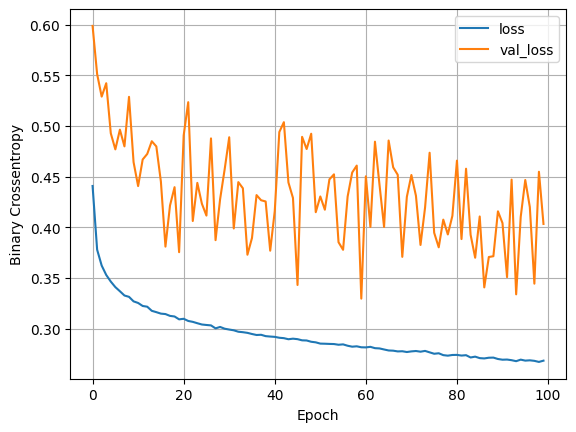

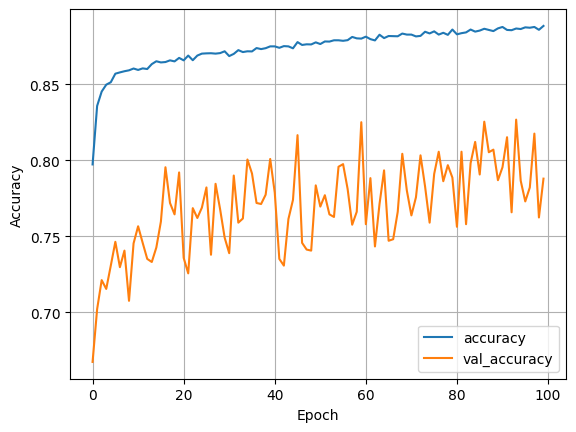

In [15]:
# Plotting the loss
plot_loss(history)
plot_accuracy(history)



So above is the plots. Here's what we are seeing/want to see:
- Want to see a decrease in loss across epochs
- Want to see an increase in accuracy across epochs
- We can expect the accuracy/loss scores to be better than the val_accuracy/loss scores. This is because the machine has seen the training data before while the validation data it has never seen before. 


FINISHED AT 1:57:40

A lot of the parameters can change, a lot of machine learning is figuring out what we set these hyper parameters to. So we actually need to perform a GRID SEARCH to figure out what happens if we have 64-64 nodes, 16-16 nodes, our learning rate, our epochs, the batch size, etc. 

In the rewritten code below, a dropout layer will be added. This randomly chooses certain nodes at a specified rate and tells them to not train them. The purpose is to avoid overfitting. 

In [16]:
def train_model(xTrain, yTrain, num_nodes, dropout_prob, lr, batch_size, epochs):
  nnModel = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nnModel.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nnModel.fit(
    xTrain, yTrain, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nnModel, history

In [17]:
import matplotlib.pyplot as plt
def plot_loss2(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch') #Epoch is just how many times it is cycling
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    
    plt.show()


16 nodes, dropout: 0, lr: 0.01, batch size: 32


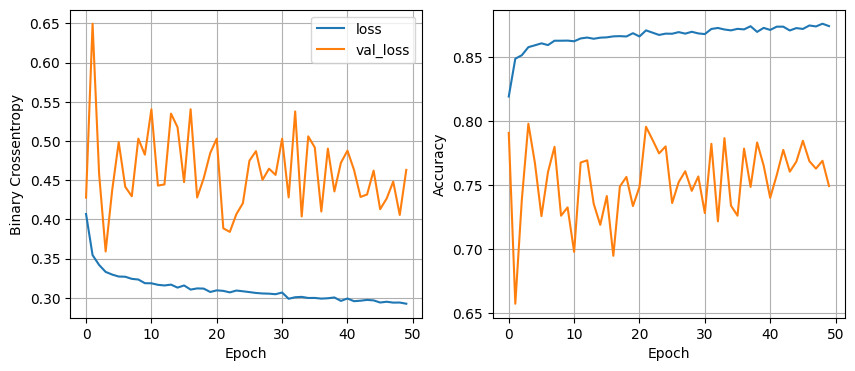

119/119 [==============================] - 0s 589us/step - loss: 0.2984 - accuracy: 0.8746
16 nodes, dropout: 0, lr: 0.01, batch size: 64


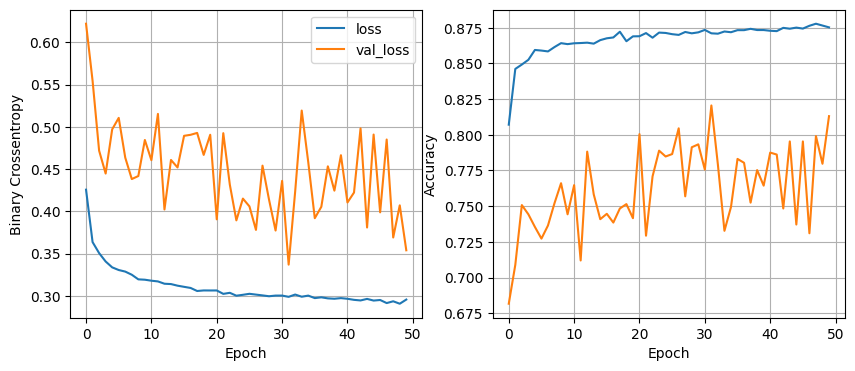

119/119 [==============================] - 0s 510us/step - loss: 0.3077 - accuracy: 0.8736
16 nodes, dropout: 0, lr: 0.01, batch size: 128


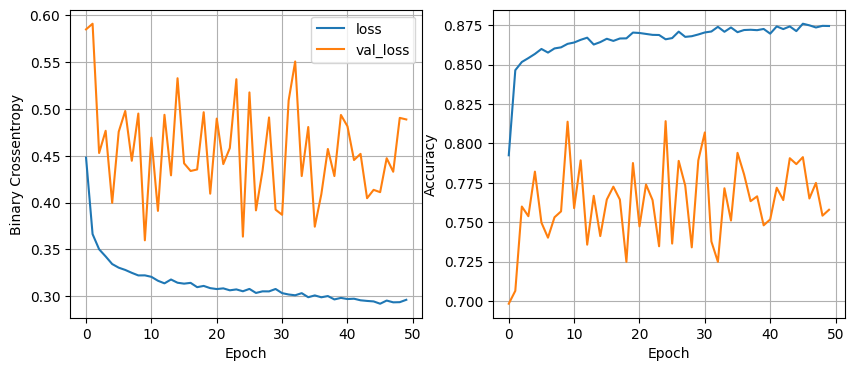

119/119 [==============================] - 0s 532us/step - loss: 0.3083 - accuracy: 0.8741
16 nodes, dropout: 0, lr: 0.005, batch size: 32


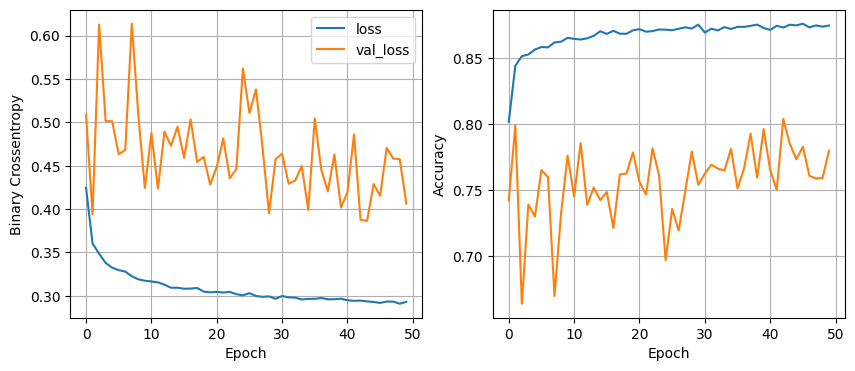

119/119 [==============================] - 0s 577us/step - loss: 0.3038 - accuracy: 0.8772
16 nodes, dropout: 0, lr: 0.005, batch size: 64


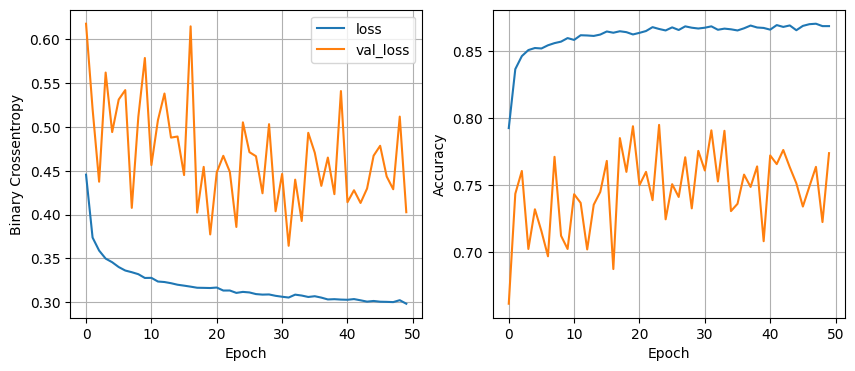

119/119 [==============================] - 0s 538us/step - loss: 0.3087 - accuracy: 0.8770
16 nodes, dropout: 0, lr: 0.005, batch size: 128


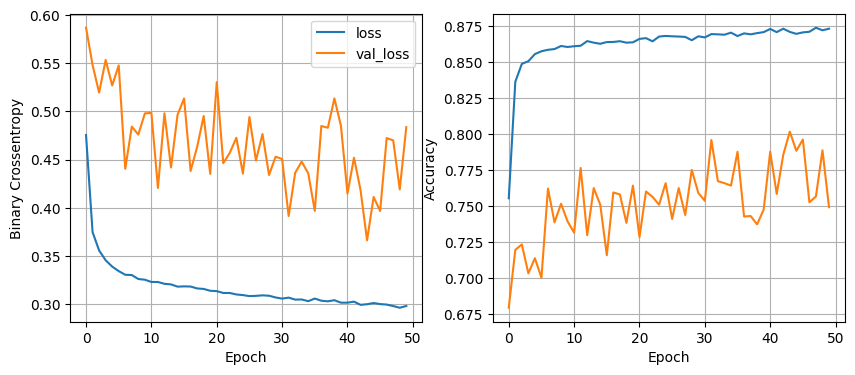

119/119 [==============================] - 0s 526us/step - loss: 0.3009 - accuracy: 0.8775
16 nodes, dropout: 0, lr: 0.001, batch size: 32


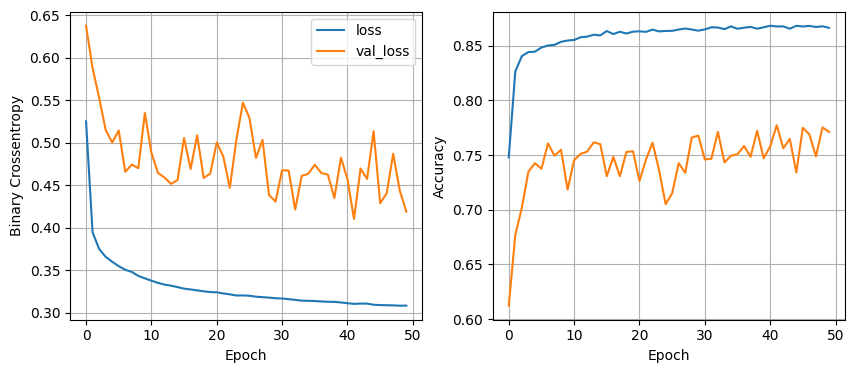

119/119 [==============================] - 0s 586us/step - loss: 0.3119 - accuracy: 0.8775
16 nodes, dropout: 0, lr: 0.001, batch size: 64


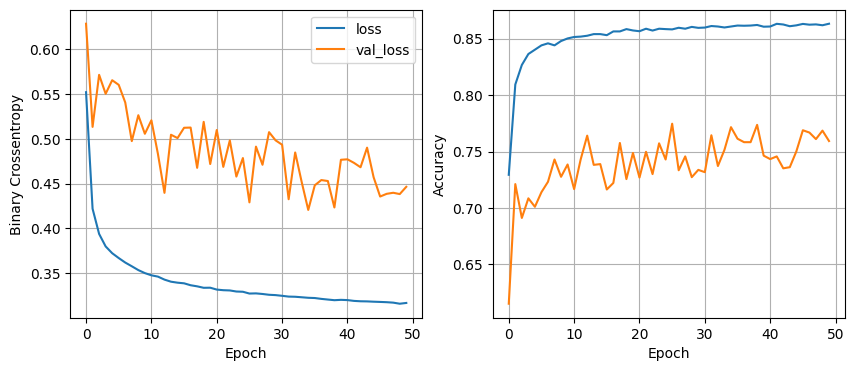

119/119 [==============================] - 0s 609us/step - loss: 0.3082 - accuracy: 0.8749
16 nodes, dropout: 0, lr: 0.001, batch size: 128


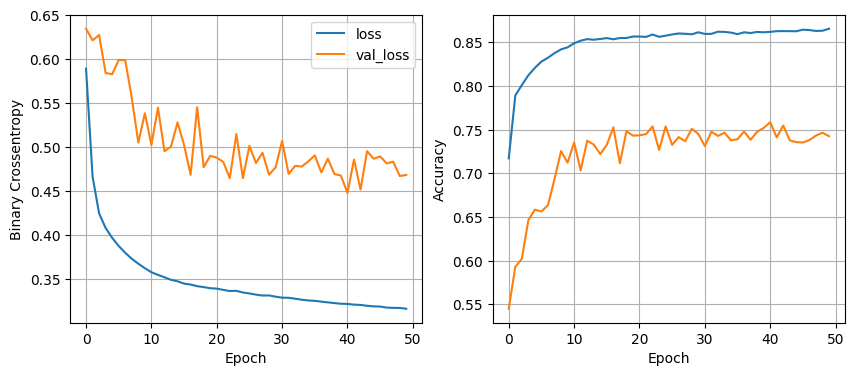

119/119 [==============================] - 0s 510us/step - loss: 0.3096 - accuracy: 0.8749
16 nodes, dropout: 0.2, lr: 0.01, batch size: 32


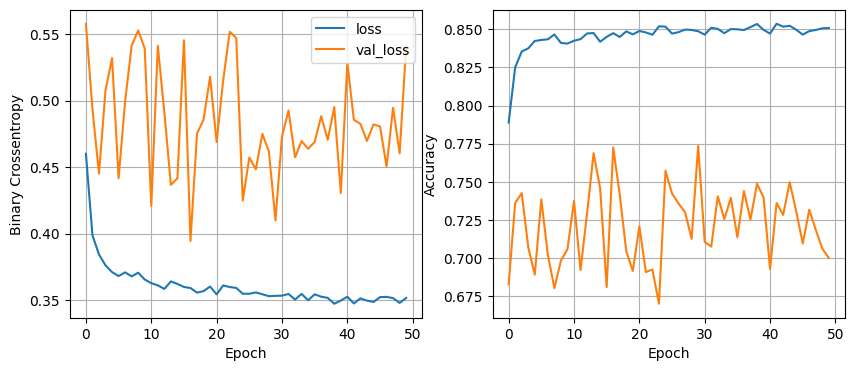

119/119 [==============================] - 0s 515us/step - loss: 0.3058 - accuracy: 0.8749
16 nodes, dropout: 0.2, lr: 0.01, batch size: 64


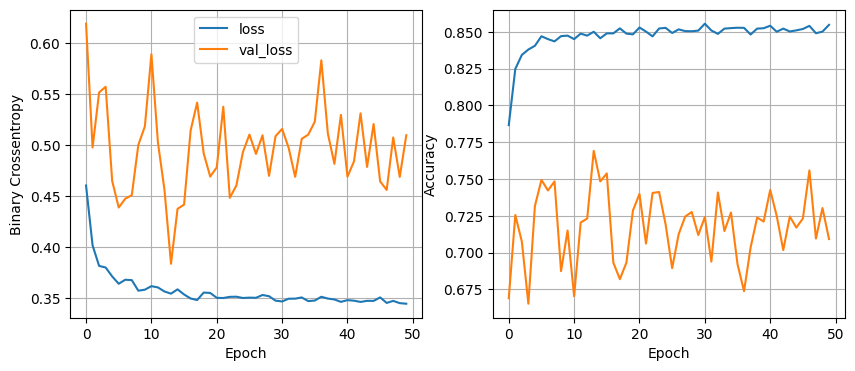

119/119 [==============================] - 0s 569us/step - loss: 0.3045 - accuracy: 0.8778
16 nodes, dropout: 0.2, lr: 0.01, batch size: 128


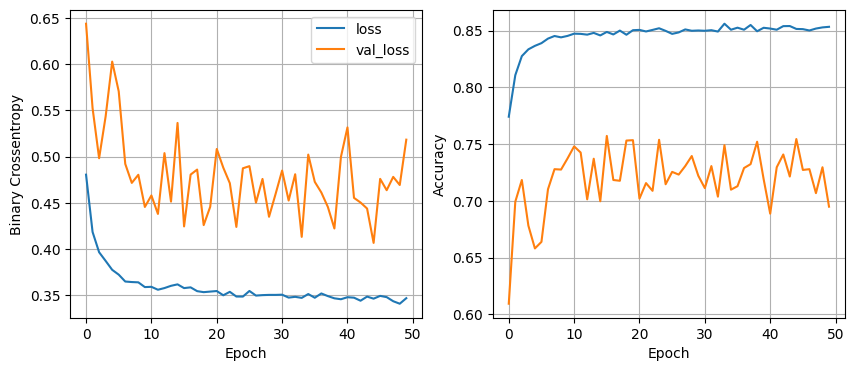

119/119 [==============================] - 0s 570us/step - loss: 0.3071 - accuracy: 0.8767
16 nodes, dropout: 0.2, lr: 0.005, batch size: 32


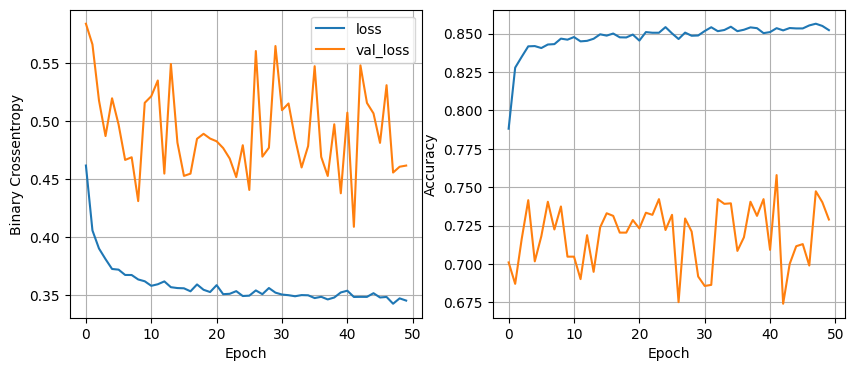

119/119 [==============================] - 0s 590us/step - loss: 0.3084 - accuracy: 0.8762
16 nodes, dropout: 0.2, lr: 0.005, batch size: 64


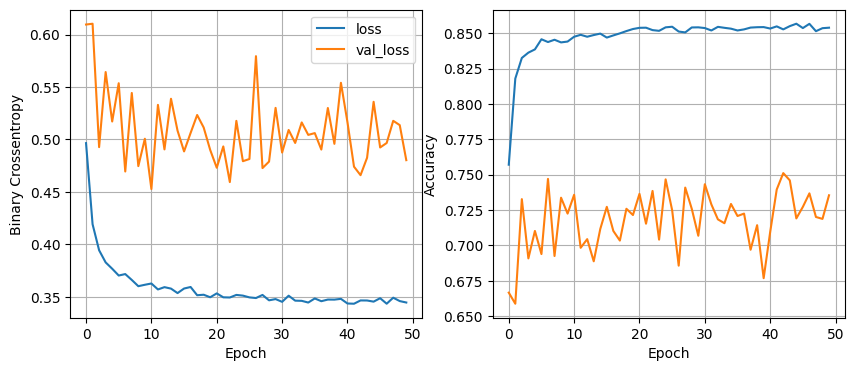

119/119 [==============================] - 0s 640us/step - loss: 0.3080 - accuracy: 0.8764
16 nodes, dropout: 0.2, lr: 0.005, batch size: 128


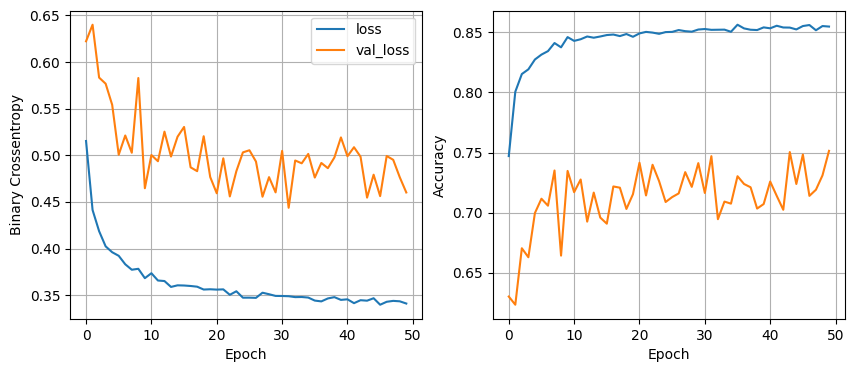

119/119 [==============================] - 0s 497us/step - loss: 0.3035 - accuracy: 0.8738
16 nodes, dropout: 0.2, lr: 0.001, batch size: 32


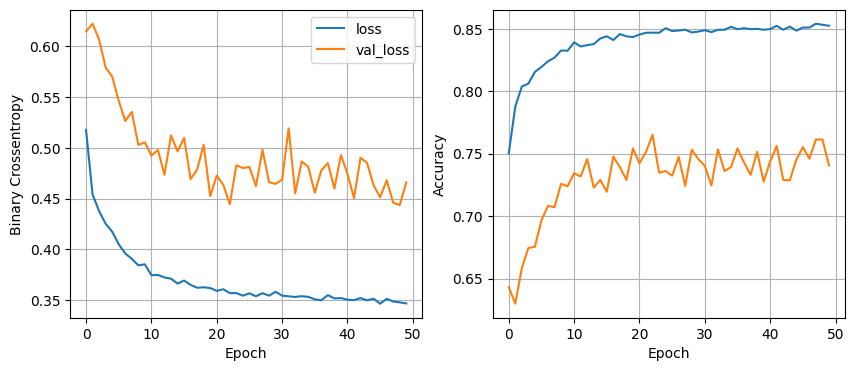

119/119 [==============================] - 0s 536us/step - loss: 0.3123 - accuracy: 0.8715
16 nodes, dropout: 0.2, lr: 0.001, batch size: 64


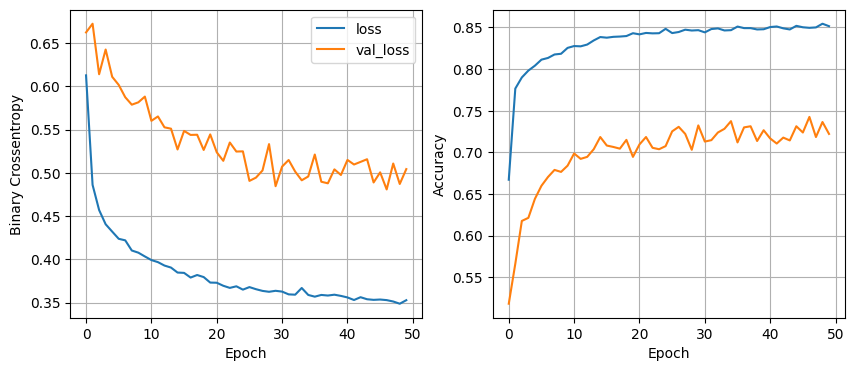

119/119 [==============================] - 0s 613us/step - loss: 0.3080 - accuracy: 0.8762
16 nodes, dropout: 0.2, lr: 0.001, batch size: 128


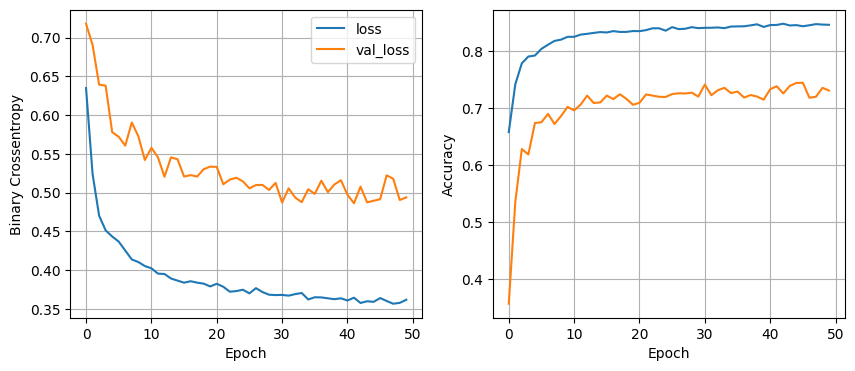

119/119 [==============================] - 0s 607us/step - loss: 0.3195 - accuracy: 0.8686
32 nodes, dropout: 0, lr: 0.01, batch size: 32


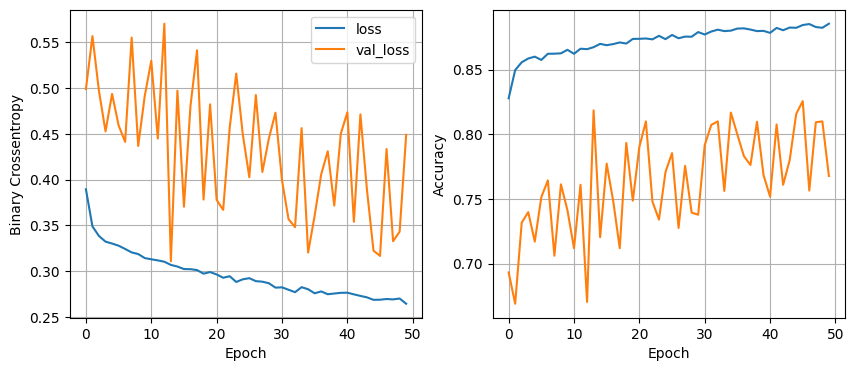

119/119 [==============================] - 0s 544us/step - loss: 0.3140 - accuracy: 0.8767
32 nodes, dropout: 0, lr: 0.01, batch size: 64


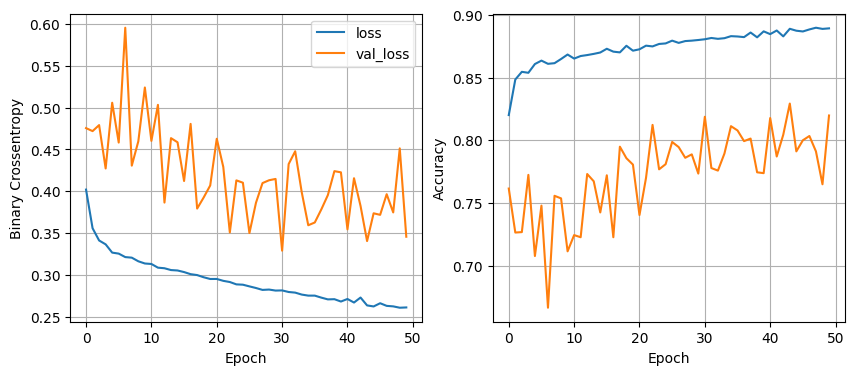

119/119 [==============================] - 0s 634us/step - loss: 0.3229 - accuracy: 0.8680
32 nodes, dropout: 0, lr: 0.01, batch size: 128


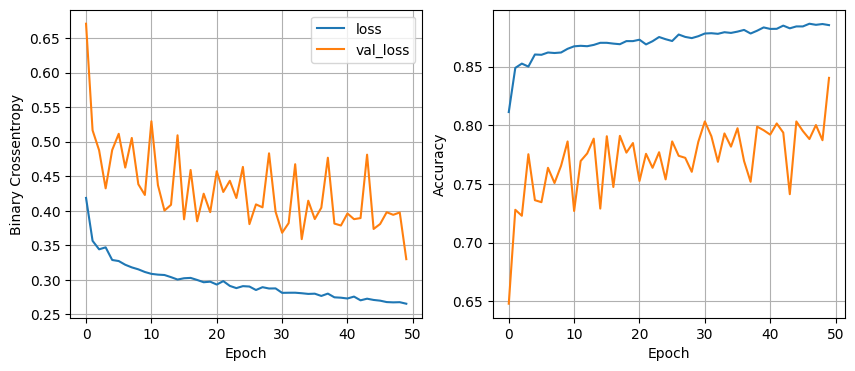

119/119 [==============================] - 0s 575us/step - loss: 0.3211 - accuracy: 0.8754
32 nodes, dropout: 0, lr: 0.005, batch size: 32


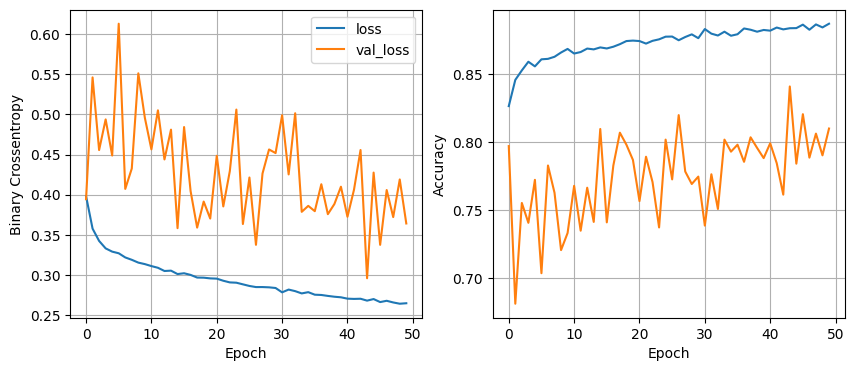

119/119 [==============================] - 0s 507us/step - loss: 0.3314 - accuracy: 0.8733
32 nodes, dropout: 0, lr: 0.005, batch size: 64


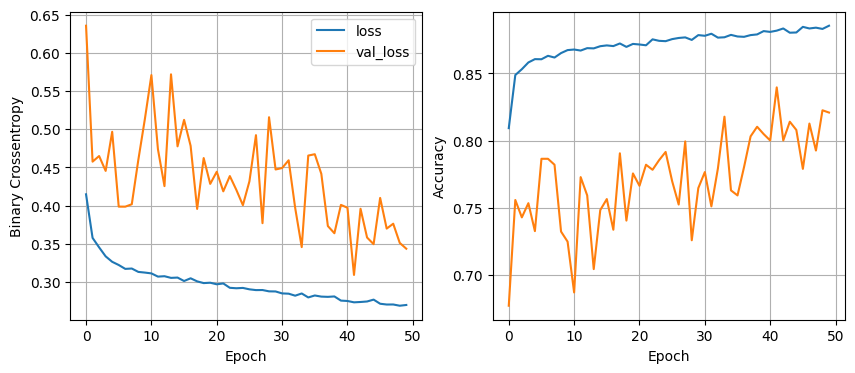

119/119 [==============================] - 0s 522us/step - loss: 0.3048 - accuracy: 0.8788
32 nodes, dropout: 0, lr: 0.005, batch size: 128


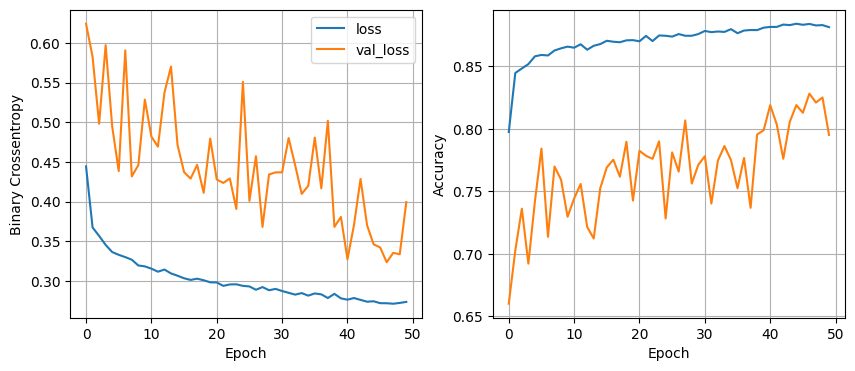

119/119 [==============================] - 0s 597us/step - loss: 0.3098 - accuracy: 0.8754
32 nodes, dropout: 0, lr: 0.001, batch size: 32


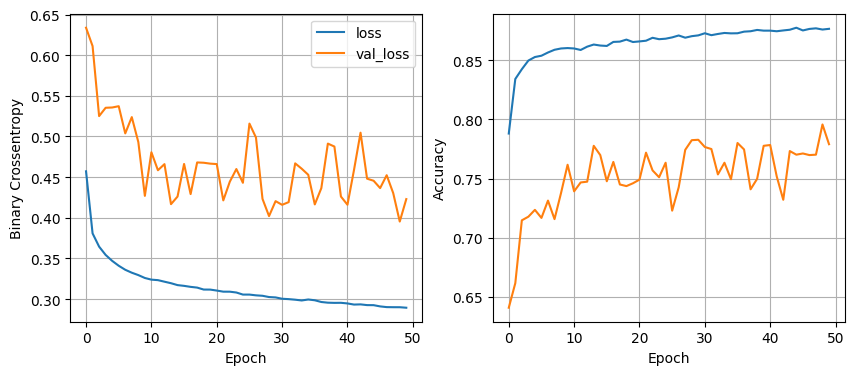

119/119 [==============================] - 0s 582us/step - loss: 0.3001 - accuracy: 0.8770
32 nodes, dropout: 0, lr: 0.001, batch size: 64


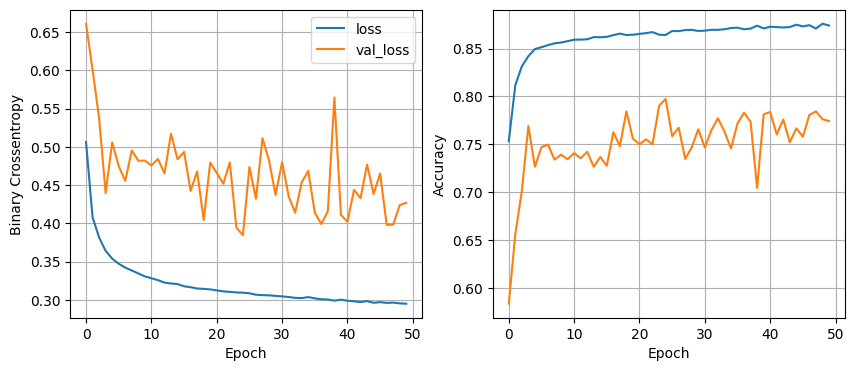

119/119 [==============================] - 0s 542us/step - loss: 0.3049 - accuracy: 0.8728
32 nodes, dropout: 0, lr: 0.001, batch size: 128


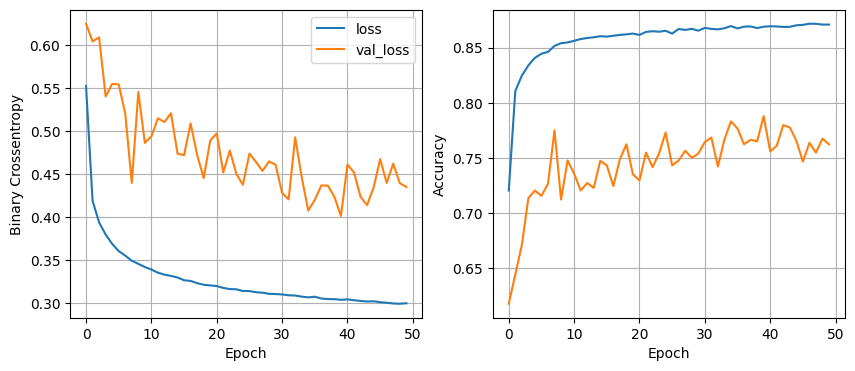

119/119 [==============================] - 0s 508us/step - loss: 0.3059 - accuracy: 0.8722
32 nodes, dropout: 0.2, lr: 0.01, batch size: 32


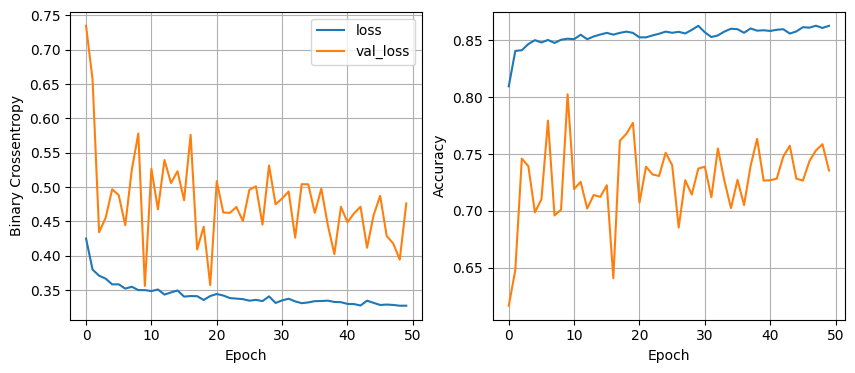

119/119 [==============================] - 0s 534us/step - loss: 0.2987 - accuracy: 0.8757
32 nodes, dropout: 0.2, lr: 0.01, batch size: 64


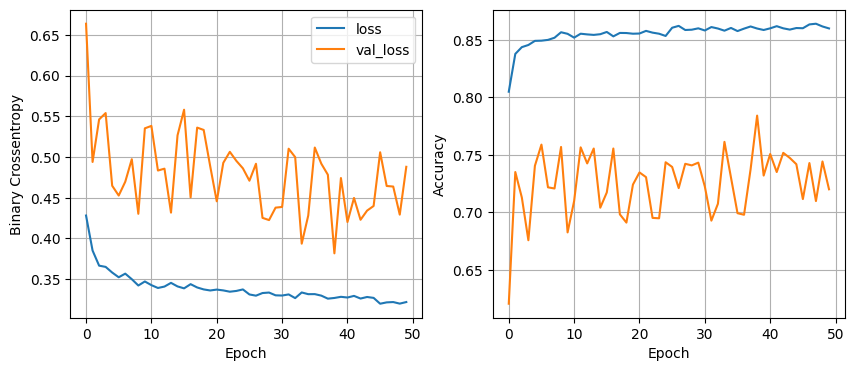

119/119 [==============================] - 0s 478us/step - loss: 0.2938 - accuracy: 0.8791
32 nodes, dropout: 0.2, lr: 0.01, batch size: 128


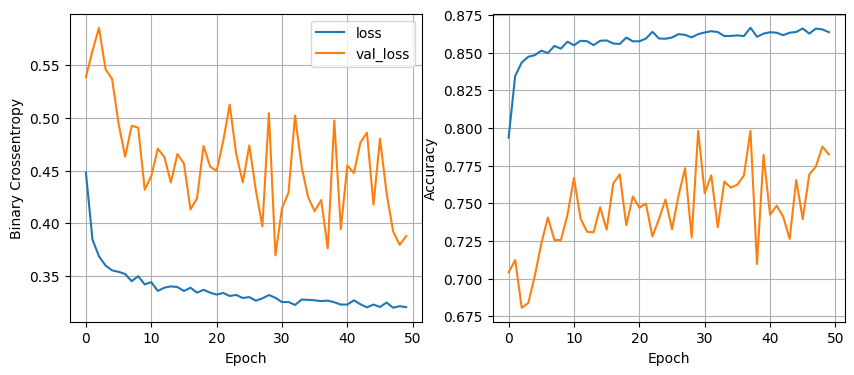

119/119 [==============================] - 0s 551us/step - loss: 0.3040 - accuracy: 0.8746
32 nodes, dropout: 0.2, lr: 0.005, batch size: 32


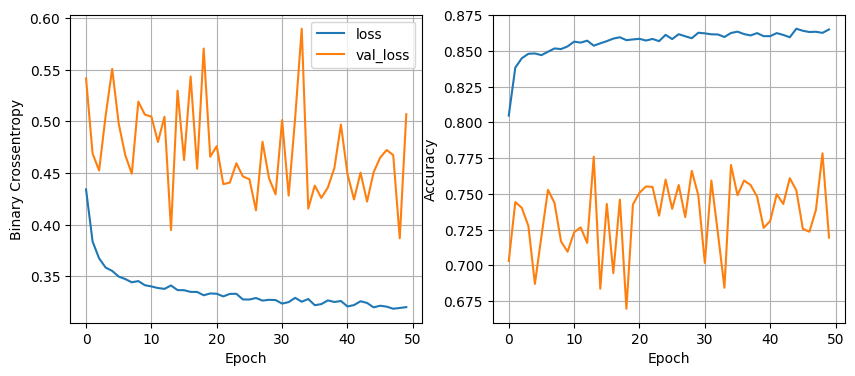

119/119 [==============================] - 0s 602us/step - loss: 0.3022 - accuracy: 0.8733
32 nodes, dropout: 0.2, lr: 0.005, batch size: 64


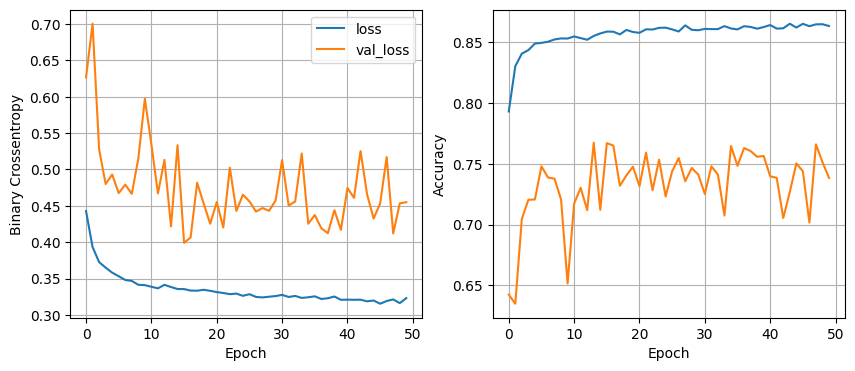

119/119 [==============================] - 0s 568us/step - loss: 0.2903 - accuracy: 0.8770
32 nodes, dropout: 0.2, lr: 0.005, batch size: 128


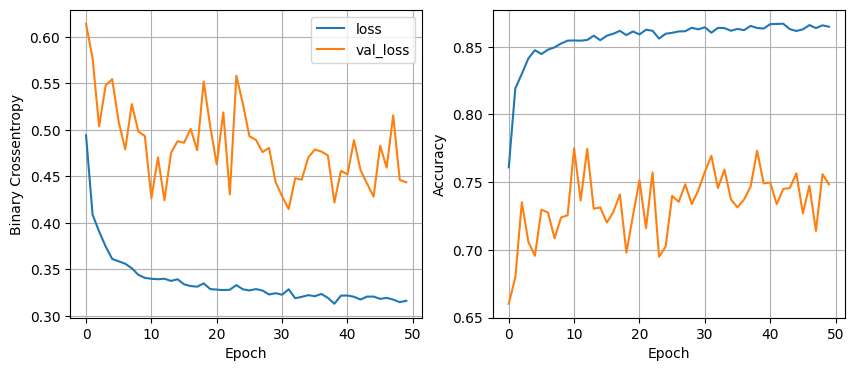

119/119 [==============================] - 0s 517us/step - loss: 0.2941 - accuracy: 0.8807
32 nodes, dropout: 0.2, lr: 0.001, batch size: 32


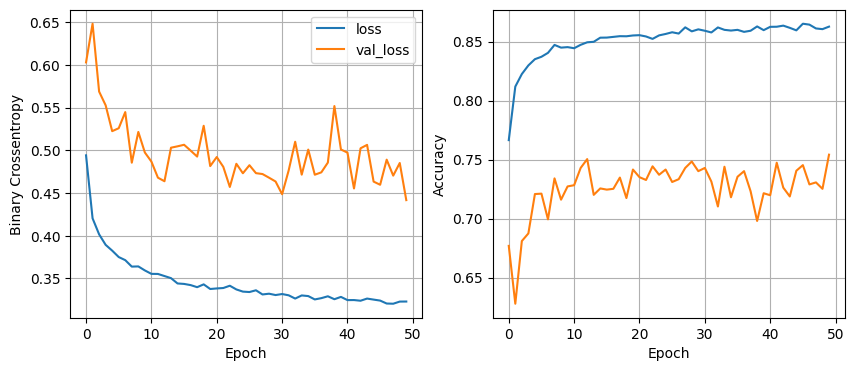

119/119 [==============================] - 0s 552us/step - loss: 0.2961 - accuracy: 0.8770
32 nodes, dropout: 0.2, lr: 0.001, batch size: 64


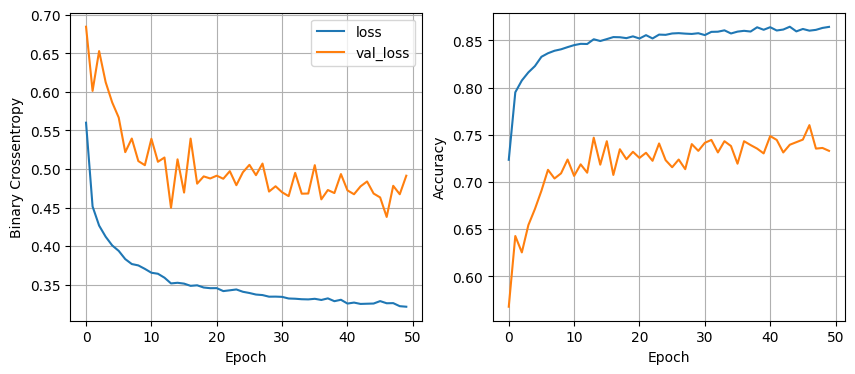

119/119 [==============================] - 0s 582us/step - loss: 0.2921 - accuracy: 0.8785
32 nodes, dropout: 0.2, lr: 0.001, batch size: 128


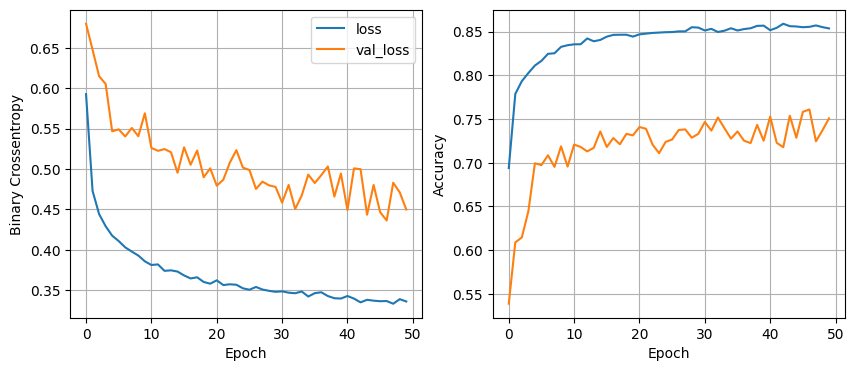

119/119 [==============================] - 0s 536us/step - loss: 0.3038 - accuracy: 0.8746
64 nodes, dropout: 0, lr: 0.01, batch size: 32


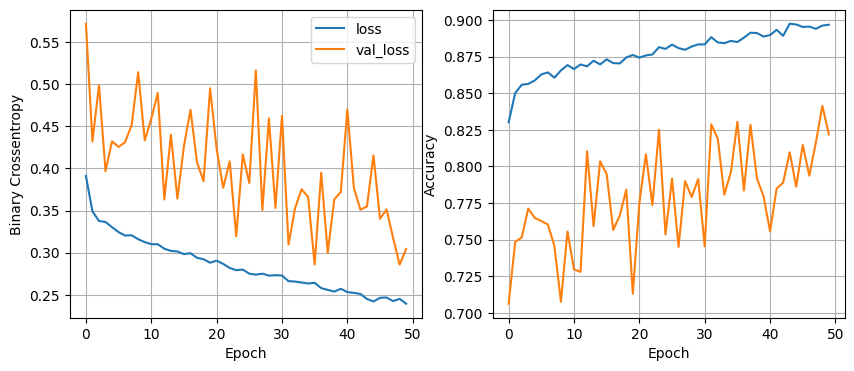

119/119 [==============================] - 0s 514us/step - loss: 0.3437 - accuracy: 0.8738
64 nodes, dropout: 0, lr: 0.01, batch size: 64


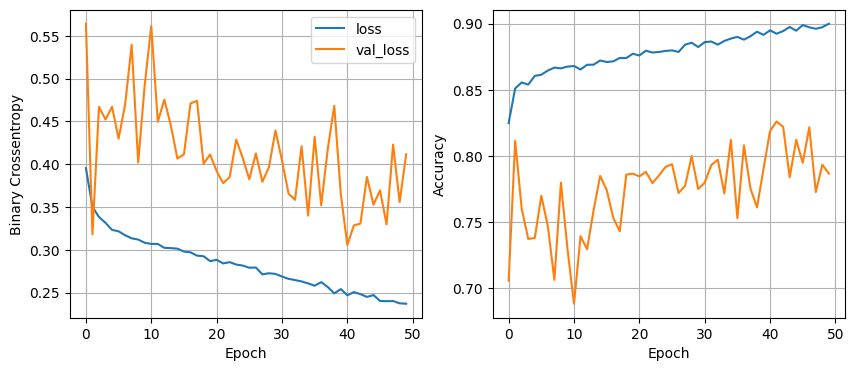

119/119 [==============================] - 0s 543us/step - loss: 0.3440 - accuracy: 0.8825
64 nodes, dropout: 0, lr: 0.01, batch size: 128


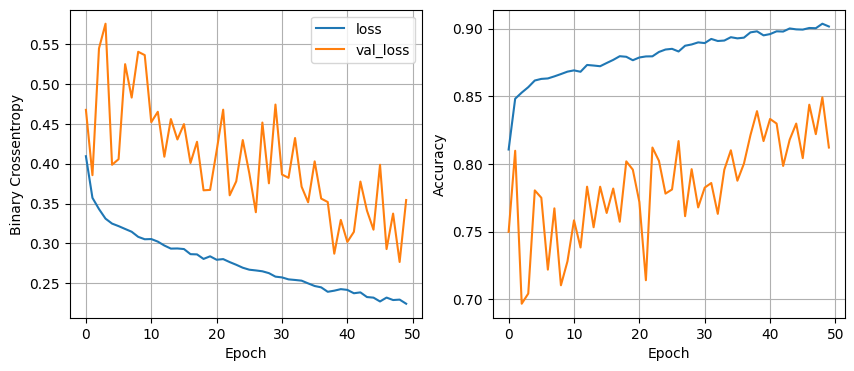

119/119 [==============================] - 0s 568us/step - loss: 0.3393 - accuracy: 0.8793
64 nodes, dropout: 0, lr: 0.005, batch size: 32


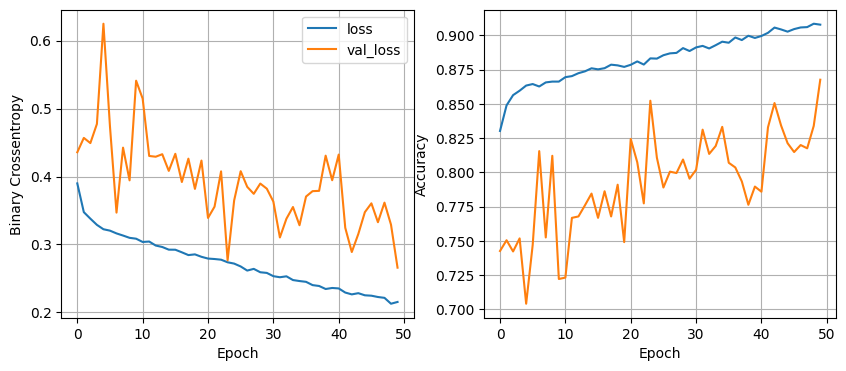

119/119 [==============================] - 0s 547us/step - loss: 0.3777 - accuracy: 0.8657
64 nodes, dropout: 0, lr: 0.005, batch size: 64


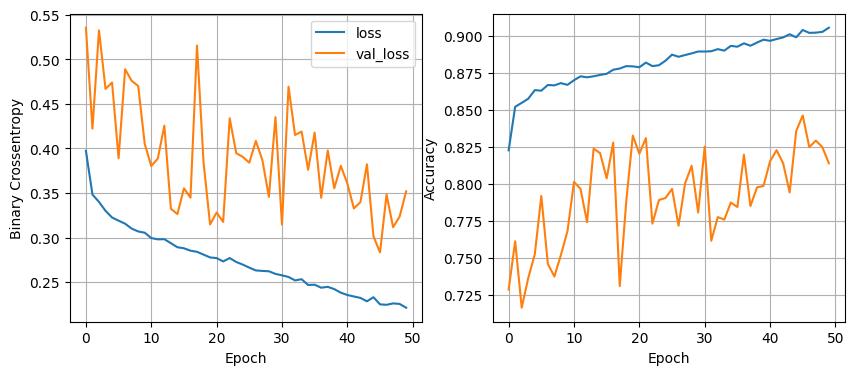

119/119 [==============================] - 0s 706us/step - loss: 0.3568 - accuracy: 0.8720
64 nodes, dropout: 0, lr: 0.005, batch size: 128


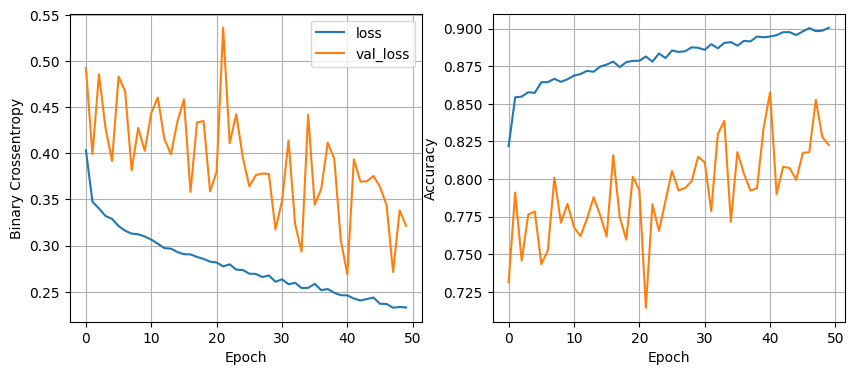

119/119 [==============================] - 0s 530us/step - loss: 0.3272 - accuracy: 0.8743
64 nodes, dropout: 0, lr: 0.001, batch size: 32


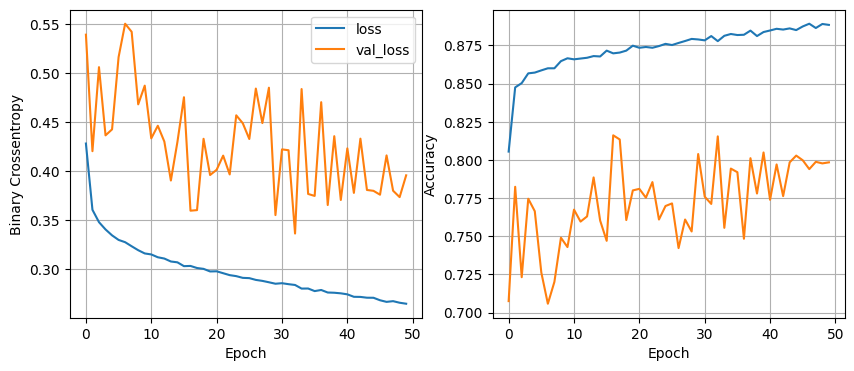

119/119 [==============================] - 0s 548us/step - loss: 0.2991 - accuracy: 0.8804
64 nodes, dropout: 0, lr: 0.001, batch size: 64


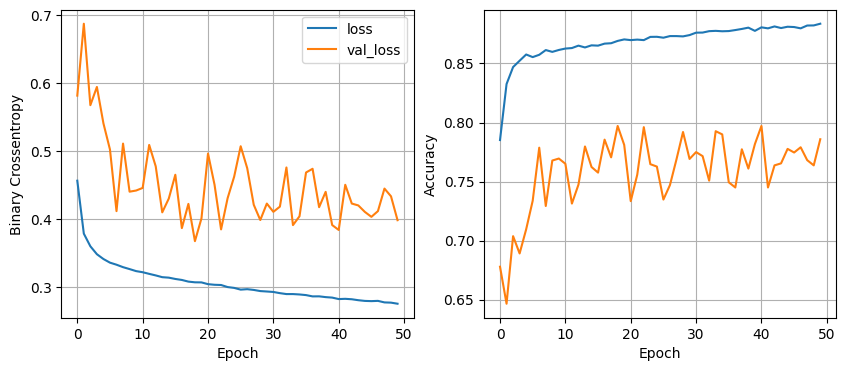

119/119 [==============================] - 0s 524us/step - loss: 0.2983 - accuracy: 0.8785
64 nodes, dropout: 0, lr: 0.001, batch size: 128


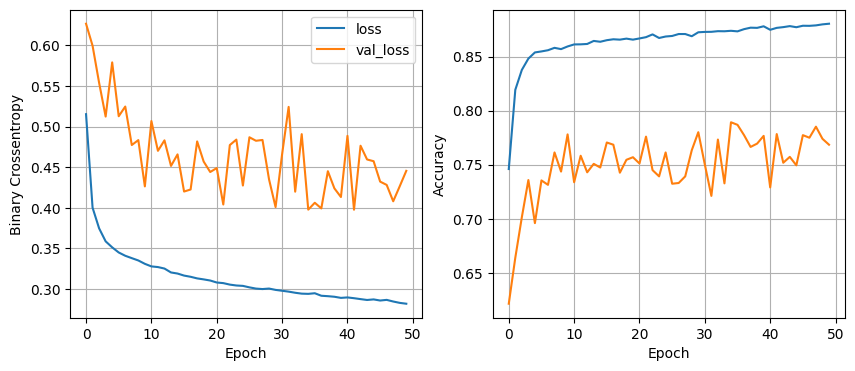

119/119 [==============================] - 0s 564us/step - loss: 0.2962 - accuracy: 0.8785
64 nodes, dropout: 0.2, lr: 0.01, batch size: 32


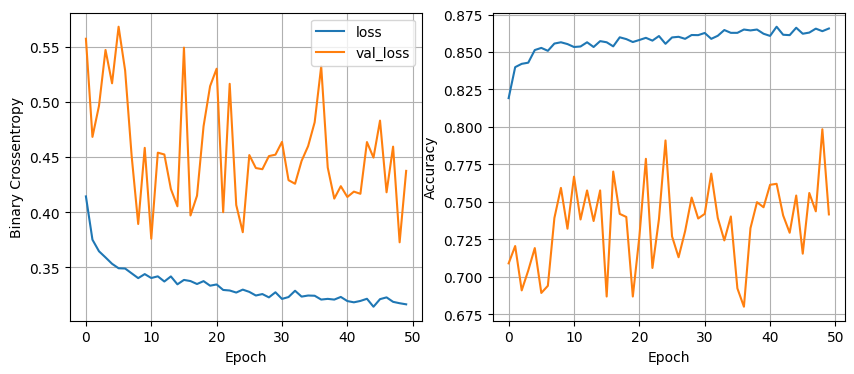

119/119 [==============================] - 0s 564us/step - loss: 0.3033 - accuracy: 0.8733
64 nodes, dropout: 0.2, lr: 0.01, batch size: 64


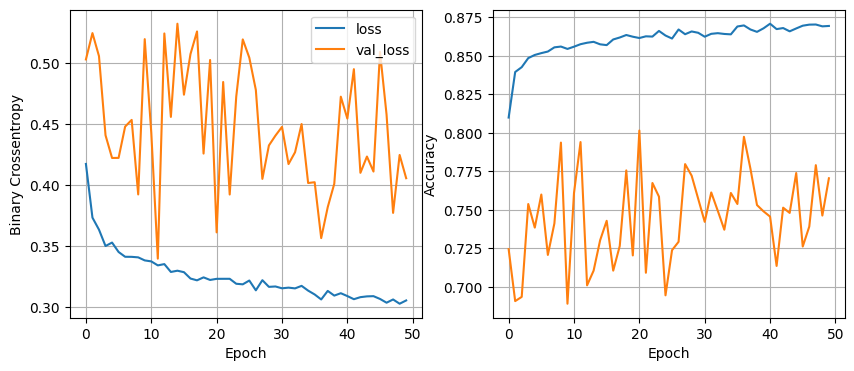

119/119 [==============================] - 0s 580us/step - loss: 0.3002 - accuracy: 0.8775
64 nodes, dropout: 0.2, lr: 0.01, batch size: 128


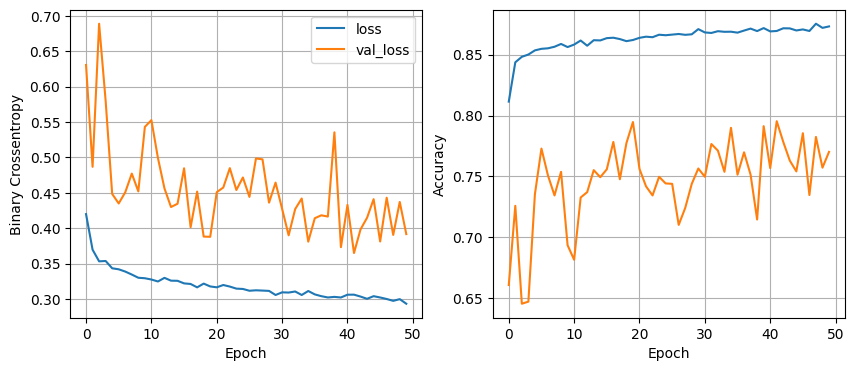

119/119 [==============================] - 0s 578us/step - loss: 0.3028 - accuracy: 0.8762
64 nodes, dropout: 0.2, lr: 0.005, batch size: 32


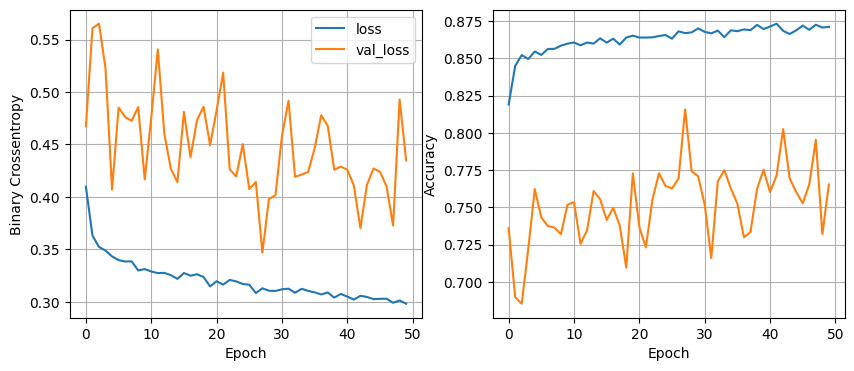

119/119 [==============================] - 0s 612us/step - loss: 0.2995 - accuracy: 0.8780
64 nodes, dropout: 0.2, lr: 0.005, batch size: 64


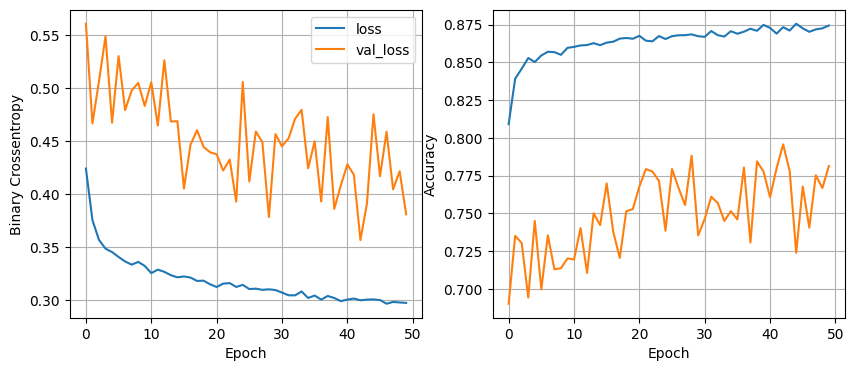

119/119 [==============================] - 0s 561us/step - loss: 0.2950 - accuracy: 0.8825
64 nodes, dropout: 0.2, lr: 0.005, batch size: 128


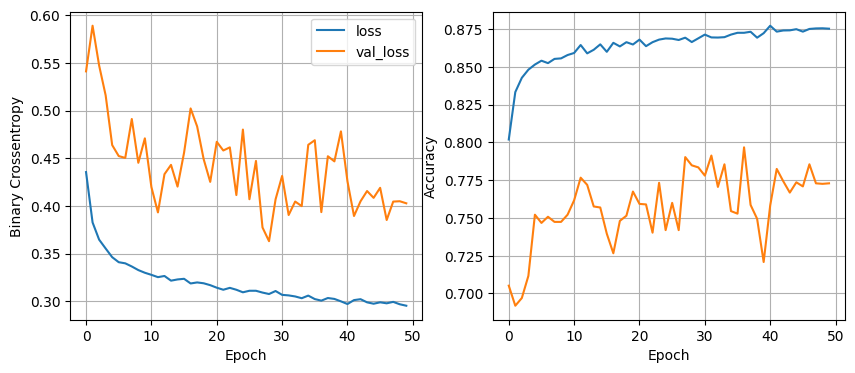

119/119 [==============================] - 0s 552us/step - loss: 0.2847 - accuracy: 0.8833
64 nodes, dropout: 0.2, lr: 0.001, batch size: 32


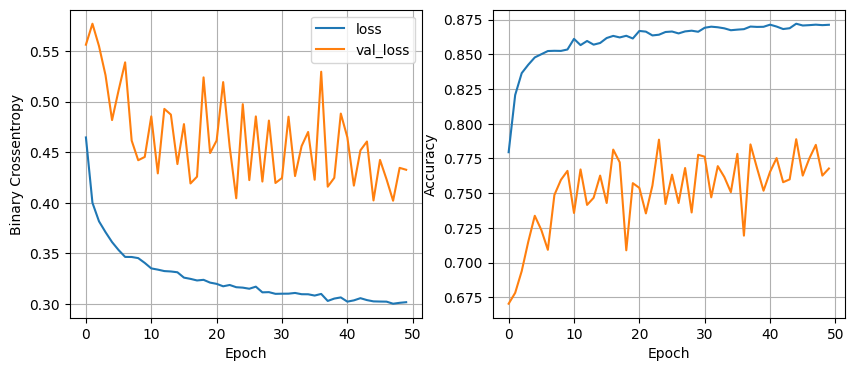

119/119 [==============================] - 0s 576us/step - loss: 0.2896 - accuracy: 0.8788
64 nodes, dropout: 0.2, lr: 0.001, batch size: 64


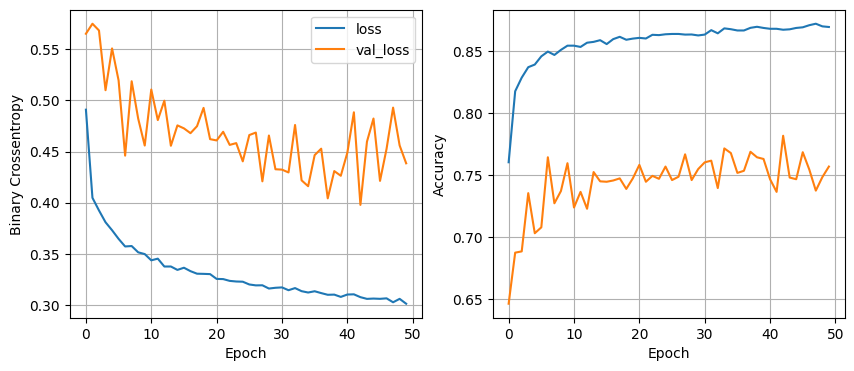

119/119 [==============================] - 0s 534us/step - loss: 0.2880 - accuracy: 0.8838
64 nodes, dropout: 0.2, lr: 0.001, batch size: 128


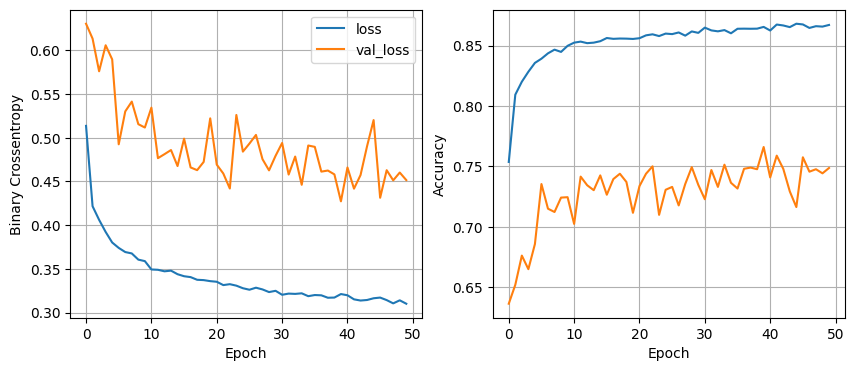

119/119 [==============================] - 0s 570us/step - loss: 0.2921 - accuracy: 0.8799


In [18]:
# Initializing a variable to record the models with the least loss
leastValLoss = float('inf')
leastLossModel = None
epochs = 50

# Grid searching through each parameter
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                # Printing out the parameters
                print(f"{num_nodes} nodes, dropout: {dropout_prob}, lr: {lr}, batch size: {batch_size}")

                # Compiling and training the neural net model
                model, history = train_model(xTrain, yTrain, num_nodes, dropout_prob,lr, batch_size, epochs)

                # Plotting our loss
                plot_loss2(history)

                # Printing out OUR validation datasets loss
                val_loss = model.evaluate(xValid, yValid)[0]

                # Tracking the best model
                if val_loss < leastValLoss:
                    leastValLoss = val_loss
                    leastLossModel = model


In [ ]:
Finished at 2:06:00